# Open CV


In [1]:
import cv2
print(cv2.__version__)

4.8.0


In [2]:
import numpy as np
import pandas as pd

In [4]:
image=np.zeros((200,400),np.uint8)
image[:]=200

# 윈도우 생성
cv2.namedWindow("윈도우 생성")

# 윈도우에 이미지 생성
cv2.imshow("윈도우생성",image)

# 키보드 입력 대기
cv2.waitKey(0) 

# 윈도우 종료
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 도형그리기

#### 직선 및 사각형

In [5]:
# 흰색 이미지 배열 생성
# 자료형을 np.uint8 로 설정  - 이미지는 0~255 사이의 숫자만 이용
# 이미지가 2차원 - 흑백, 3차원 - 컬러
image=np.zeros(shape=(512,512,3),dtype=np.uint8)+255 # 	512,512,3 -> 컬러색상

# 튜플로 좌표 생성
pt1=100,100
pt2=400,400
cv2.rectangle(image,pt1,pt2,(255,0,0),2)


# 윈도우에 이미지 출력
cv2.imshow('image',image)
# 키보드 입력 대기
cv2.waitKey(0)
# 윈도우 종료
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

#### 원그리기

In [4]:
# 원그리기
# 흰색 이미지 배열 생성
# 자료형을 np.uint8 로 설정  - 이미지는 0~255 사이의 숫자만 이용
# 이미지가 2차원 - 흑백, 3차원 - 컬러
image=np.zeros(shape=(512,512,3),dtype=np.uint8)+255 # 	512,512,3 -> 컬러색상

# OPEN cv에서는 옵션을 정수로 설정한다. -> python 에서는 일반적인 나누기를 하면 실수로 값을 제공한다. 

# cv2.circle(image,(image.shape[0]//2,image.shape[1]//2),radius=50,color=(0,0,255),thickness=2)
cv2.circle(image,(int(image.shape[0]/2),image.shape[1]//2),radius=50,color=(0,0,255),thickness=-1) # thickness 에 -1 을 주면 원 안을 채워준다


# 윈도우에 이미지 출력
cv2.imshow('image',image)
# 키보드 입력 대기
cv2.waitKey(0)
# 윈도우 종료
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

(2270, 3600)


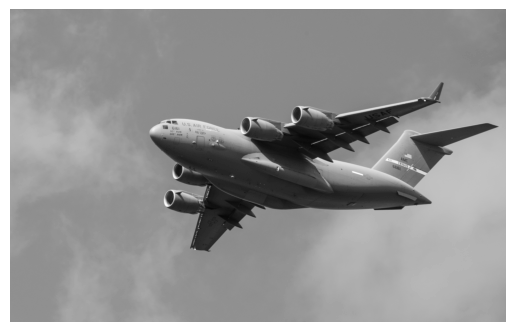

In [8]:
import matplotlib.pyplot as plt


# 이미지 데이터를 흑백으로 가져오기 - 2차원 배열
# C/C++이나 Python 에서는 상수를 정의할 떄 이름을 사용한 경우에 상수 대신 값을 직접 입력해도 된다. 
# cv2.IMREAD_GraySCALE 대신 0을 입렫해도 된다. 
# 그렇지만 상수 이름을 입력하는것을 권장한다. 

# 흑백 데이터 출력

image=cv2.imread('./data/plane.jpg',cv2.IMREAD_GRAYSCALE)
print(image.shape)


plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()


In [4]:
# Opencv는 이미지를 컬러로 가져오면 RGB 가 아니라 BGR 로 가져온다. -> 이를 변경해주자.

'''
image=cv2.imread('./data/plane.jpg',cv2.IMREAD_COLOR)
print(image.shape)


plt.imshow(image)
plt.axis('off')
plt.show()
'''
image=cv2.imread('./data/plane.jpg',cv2.IMREAD_COLOR)

image2=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)



plt.imshow(image2)
plt.axis('off')
plt.show()


NameError: name 'plt' is not defined

#### 이미지 저장

In [12]:
# 컬러 이미지를 흑백으로 저장. 
image=cv2.imread('./data/plane.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./data/plane_new.jpg',image)

True

#### 여러개의 이미지를 한 화면에 출력

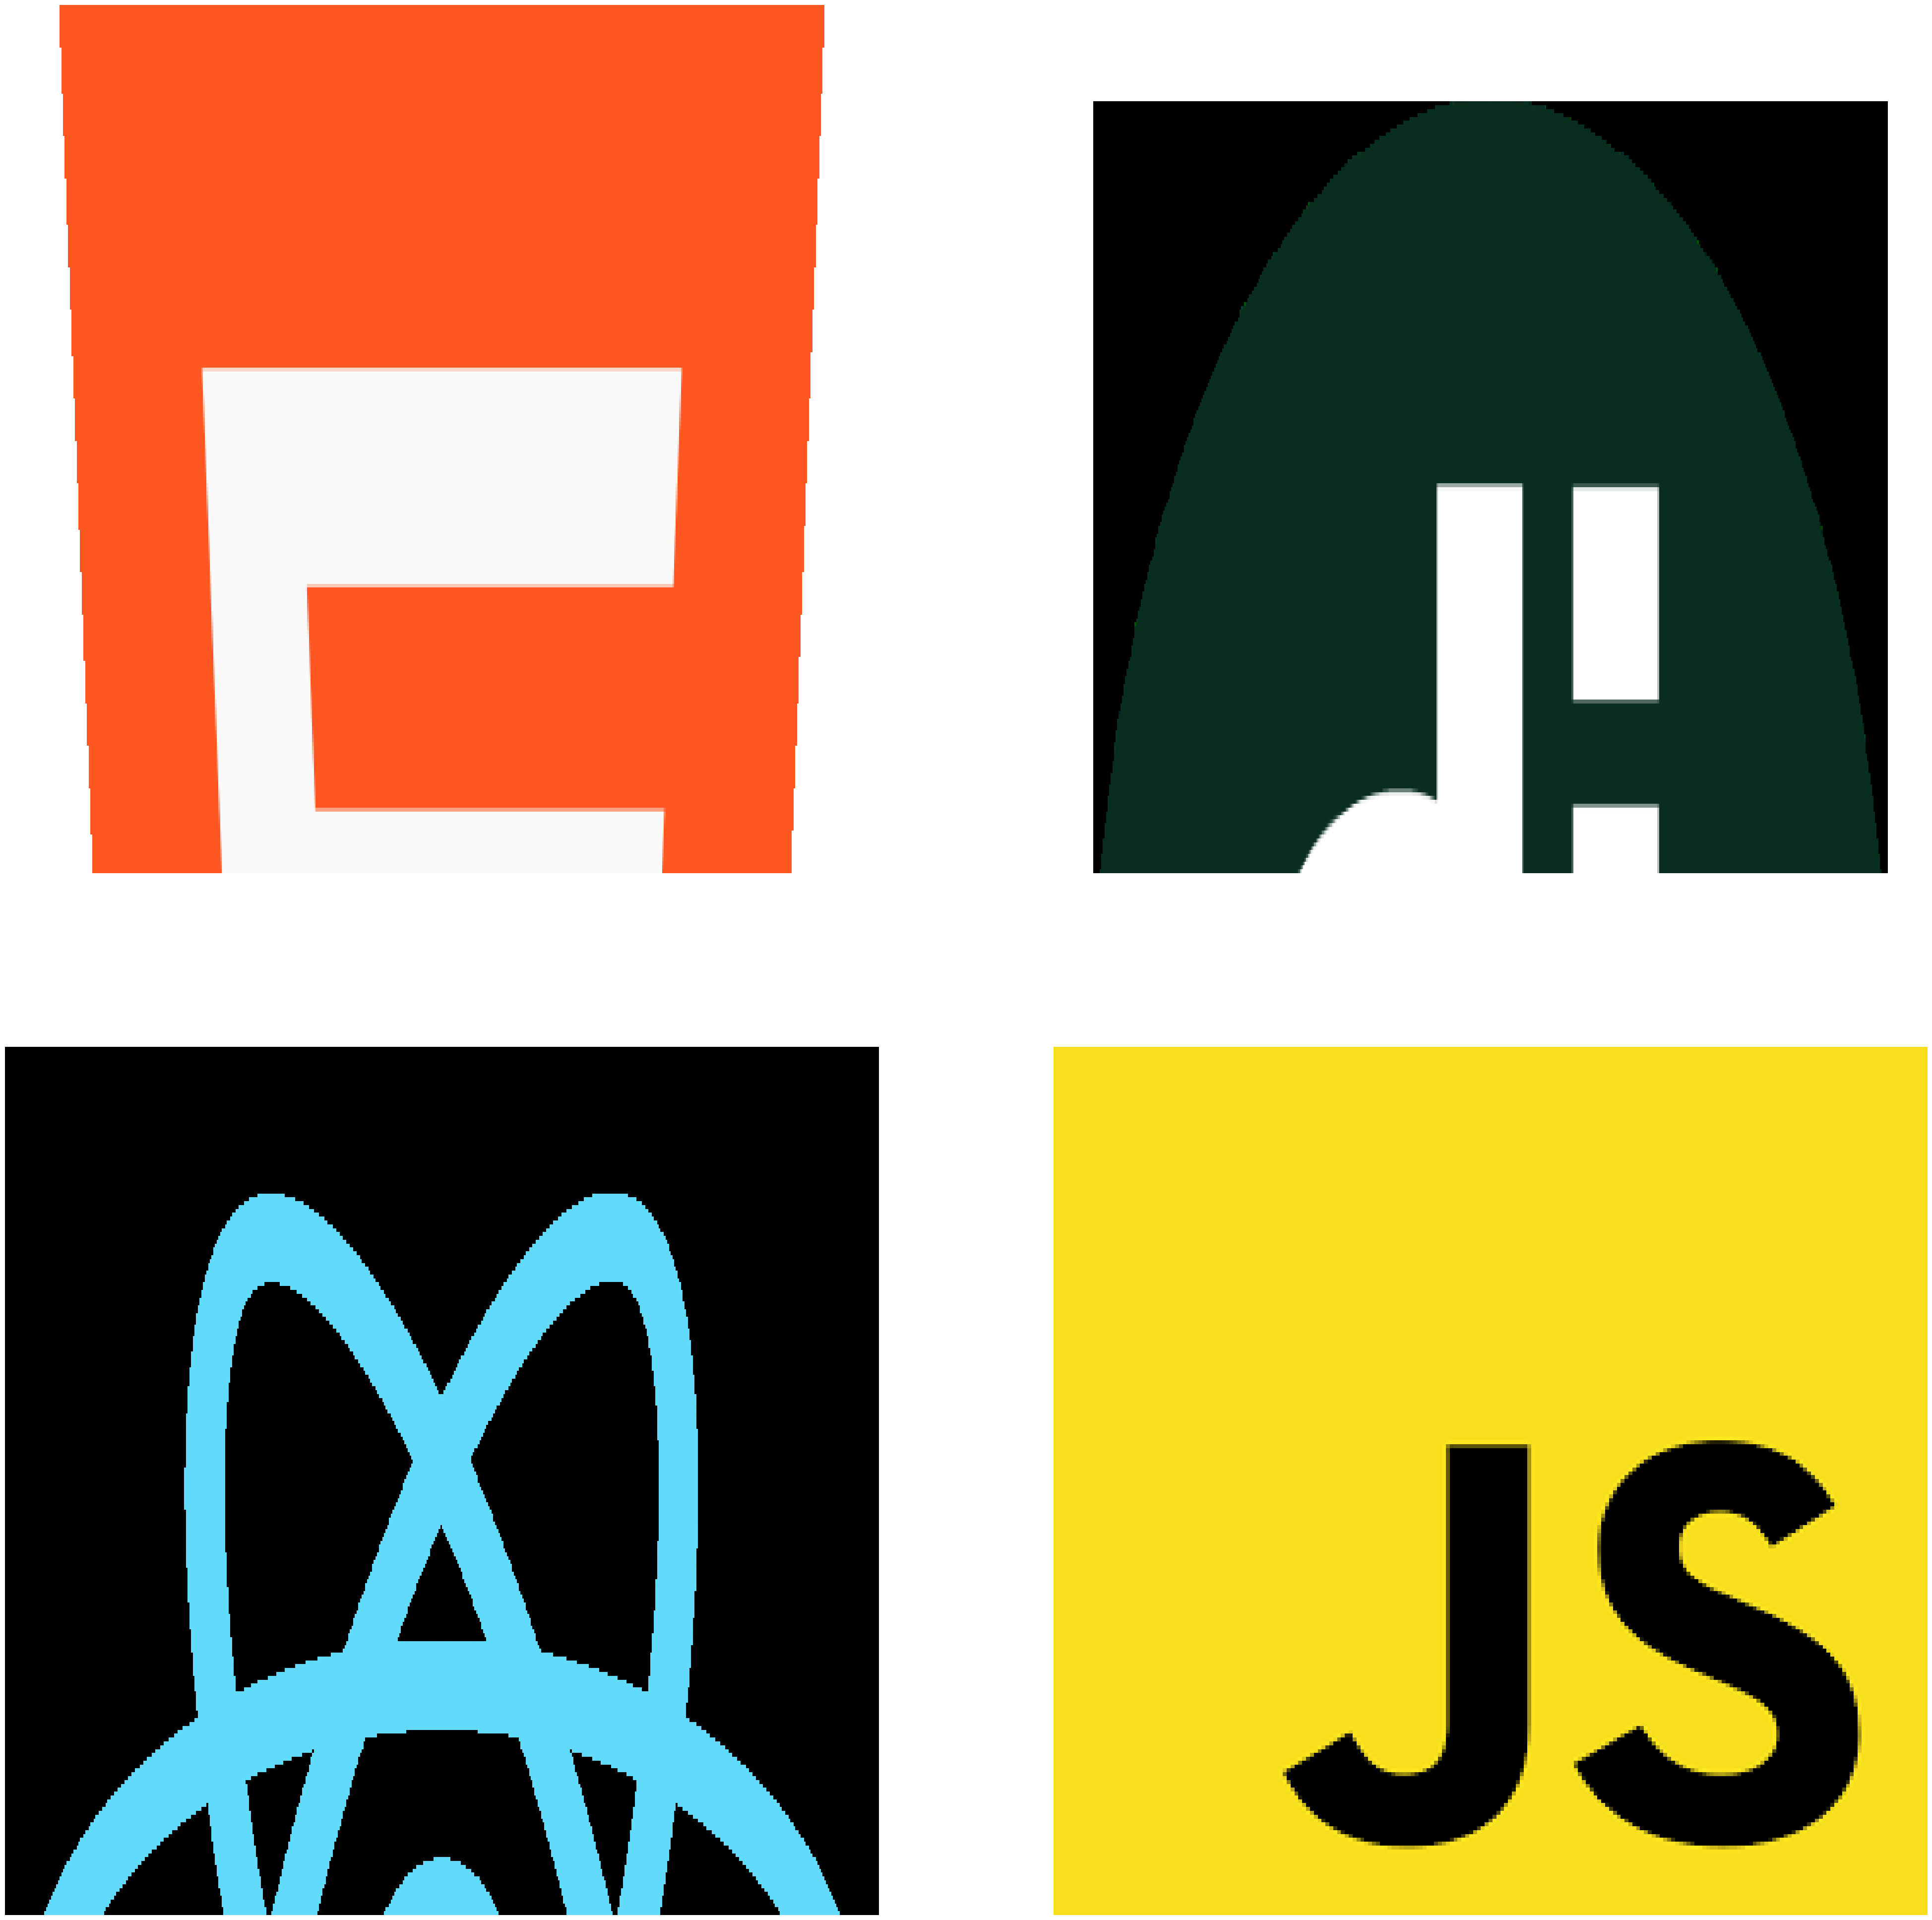

In [26]:
DATA_DIR='/Users/kimjimin/Desktop/image/'

imgBGRs=[]


# 4개의 이미지를 2*2 로 출력
imgBGRs.append(cv2.imread(DATA_DIR+'html.png'))
imgBGRs.append(cv2.imread(DATA_DIR+'django.png'))
imgBGRs.append(cv2.imread(DATA_DIR+'logo512.png'))
imgBGRs.append(cv2.imread(DATA_DIR+'js.png'))

imgRGBs=[]

for i in imgBGRs:
    imgRGBs.append(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))

# 여러개의 영역 만들기
fig,ax=plt.subplots(2,2,figsize=(10,10),sharey=True)

length=len(imgRGBs)

for i in range(length):
	ax[i//2][i%2].axis('off')
	ax[i//2][i%2].imshow(imgRGBs[i],aspect='auto')


plt.show()

## 비디오 캡쳐

In [8]:
# 문자열 출력 함수
def put_string(frame,text,pt,value,color=(120,200,90)):
    text+=str(value)
    shade=(pt[0]+2,pt[1]+2)
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,text,shade,font,0.7,(0,0,0),2)
    cv2.putText(frame,text,pt,font,0.7,color,2)
    
# 현재 디바이스의 첫번째 카메라 연결
capture=cv2.VideoCapture(1) # 

# 카메라가 연결되지 않으면 종료
if capture.isOpened()==False:
    raise Exception('카메라 연결 안됨.')

# 캡쳐된 내용 가져오기
while True:
    ret,frame=capture.read()
    if not ret:
        break
    if cv2.waitKey(30) >=0:
        break
    exposure=capture.get(cv2.CAP_PROP_EXPOSURE)
    put_string(frame,"Expos: ",(10,40),exposure)
    title='view Frame From camera'
    cv2.imshow(title,frame)
capture.release() # 비디오 자원 해제

: 

#### 모바일 디바이스로 카메라 캡쳐
- droid cam 필요

In [3]:
# 일반적으로 iphone 이나 webcam 은 video 를 설정하면 되고 android 는 mjpegfeed 로 한다. 
cap=cv2.VideoCapture('http://192.168.0.77:4747/video')
frame_size=(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
            int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =',frame_size)


while True:
    # 스마트폰이 촬영하고 있는 영상 가져오기
    retval,frame=cap.read()
    if not retval:
        break
    # 영상을 화면에 출력
    cv2.imshow('frame',frame)

    # 키보드 대기
    key=cv2.waitKey(25)
    # esc 누르면 종료
    if key==27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

frame_size = (640, 480)


KeyboardInterrupt: 

## 이미지 크기 변경 실습

img shape: (512, 512)
img shape (262144,)


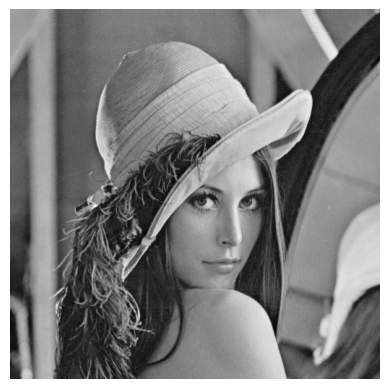

In [4]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
print("img shape:",img.shape)

# 2차원 이미지를 1차원으로 변경
img=img.flatten()
print("img shape",img.shape)

# 1차원 이미지를 3차원으로 변경
# -1 은 나머지를 전부 사용한다는 의미이다. 
#262144 / 512/ 512 가 첫번쨰 차원
img=img.reshape(-1,512,512)

plt.imshow(img[0],cmap='gray')
plt.axis('off')
plt.show()


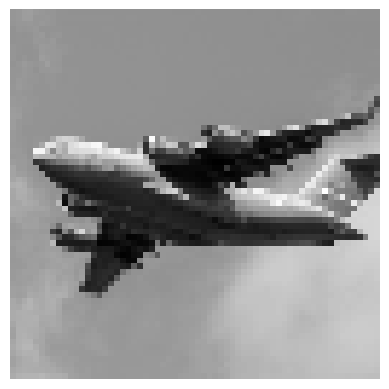

In [6]:
img=cv2.imread('./data/plane_256x256.jpg',cv2.IMREAD_GRAYSCALE)



img=cv2.resize(img,(64,64))# 픽셀 수정.
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

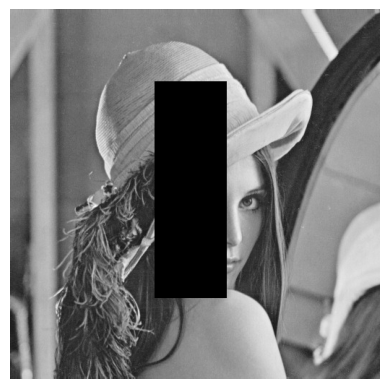

In [7]:
img=cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
img[100,200]=0
img[100:400,200:300]=0
# 이미지 전처리의 핵심중 하나가 ROI 부분을 다른 부분가 확연하게 구분되도록 하는것. 

plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

(512, 512, 3)


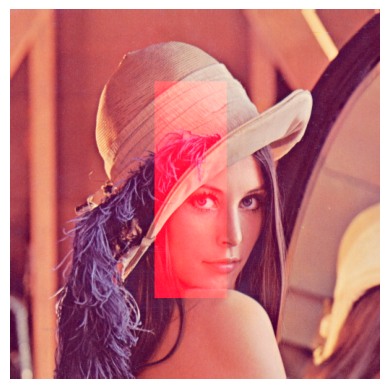

In [15]:
img=cv2.imread('./data/lena.jpg')

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

print(img.shape) # 맨앞이 세로, 두번째 가로, 세번째 색상
img[100:400,200:300,0]=255

plt.imshow(img)
plt.axis('off')
plt.show()

### 윈도우 내 ROI

In [16]:
img=cv2.imread('./data/lena.jpg',cv2.IMREAD_GRAYSCALE)
roi=cv2.selectROI(img)
print('roi : ',roi)

# 선택 영역만 ㅊ출
img=img[roi[1]:roi[1]+roi[3],roi[0]:roi[0]+roi[2]]

cv2.imshow("IMG",img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
roi :  (48, 58, 436, 400)


-1

### 영상 복사, 채널분리, 채널병합

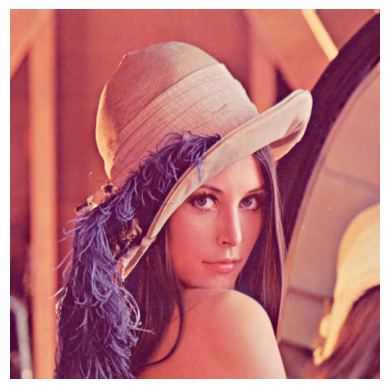

In [17]:
import cv2
img=cv2.imread('./data/lena.jpg')

# 채널 분할
b,g,r=cv2.split(img)
# 채널 병합
img=cv2.merge([r,g,b])



plt.imshow(img)
plt.axis('off')
plt.show()

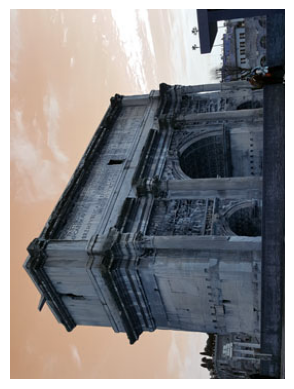

In [27]:
img=cv2.imread('./data/flip_test.jpg')

img3=cv2.flip(img,1)

img2=cv2.transpose(img)

img4=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90 도 회전
img5=cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE) # 시계반대방향으로 90 도 회전
plt.imshow(img4)
plt.axis('off')
plt.show()

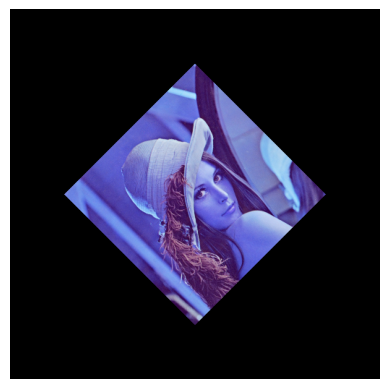

In [35]:
src=cv2.imread('./data/lena.jpg')

rows,cols,channels=src.shape

# 중앙을기준으로 45도 회전하고 0.5배 축소한 이미지
M1=cv2.getRotationMatrix2D((rows/2,cols/2),45,0.5) # 회전 축소, 몇배. 
src1=cv2.warpAffine(src,M1,(rows,cols))



plt.imshow(src1)
plt.axis('off')
plt.show()